In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from timeit import default_timer as timer
import pandas as pd


np.random.uniform()
# calculation of the exact result
def exact(d, R):
    VDexact = np.pi**(d/2) * R**d / gamma((d/2)+1)
    return float(VDexact)


# Numerical method MC
def sphere(dimension, radius):
    n = int(1e3) # The number of Monte Carlo trials
    Zn = 0
    start_time = timer()
    for i in range(n):
        xi = np.random.uniform(0, radius, dimension) # [0, d) xi for every variable
        Ri = 0   # counter for coordinates.
        for j in range(dimension):
            Ri += xi[j]**2  # sum(Xi^2) = R for a hypersphere.
        if Ri <= radius**2: # if all point are inside of the hypersphere -> (hit)
            Zn += 1 # If there's a hit increment Zn
    end_time = timer()
    # Propierties:
    #prob=zn/n scale 1
    VD = (2**dimension)*(radius**dimension)*(Zn/n) # N0 Hyperoctant * Hypercube area * prob (zn/n)
    VDexact = exact(dimension,radius) # The known value of the volume of the sphere
    error = abs((VD - VDexact) / VDexact * 100) # Compare the calculated volume to the known volume
    time = end_time - start_time
    return [dimension, VD, VDexact, error, time]

In [ ]:
dimensions=range(1, 21)
r = 1

data = [sphere(i,r) for i in dimensions]
column_names = ["Dimension", "Volume", "Exact Volume", "Error", "time"]
df = pd.DataFrame(data, columns = column_names)

# display
display(df.style.hide_index())

Dimension,Volume,Exact Volume,Error,time
1,2.000000,2.000000,0.000000,7.239596
2,3.141828,3.141593,0.007491,5.998121
3,4.194136,4.188790,0.127621,6.409700
4,4.936128,4.934802,0.026866,6.852404
5,5.273312,5.263789,0.180915,7.292208
6,5.151616,5.167713,0.311488,7.714718
7,4.694528,4.724766,0.639989,8.390843
8,4.021248,4.058712,0.923055,8.874891
9,3.322368,3.298509,0.723330,9.062705
10,2.583552,2.550164,1.309248,10.045956


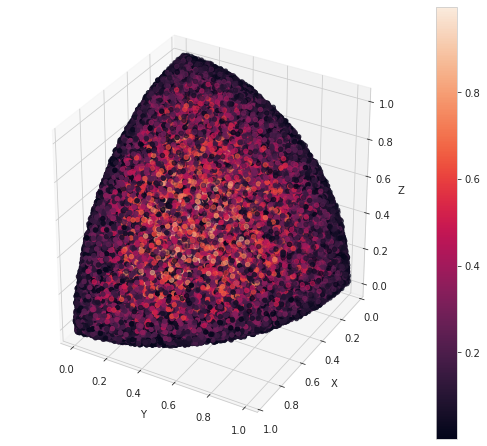

In [65]:
import seaborn as sns
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(7,6))

ax = Axes3D(fig) # Method 1

trials = int(1e7)
x = np.random.uniform(0,1,size=trials)
y = np.random.uniform(0,1,size=trials)
z = np.random.uniform(0,1,size=trials)
w = np.random.uniform(0,1,size=trials)
xr, yr, zr, wr = [], [], [], []


for i in range(0, trials):
    if x[i]**2 + y[i]**2 + z[i]**2 + w[i]**2 <= 1:
        xr.append(x[i])
        yr.append(y[i])
        zr.append(z[i])
        wr.append(w[i])

img = ax.scatter(xr, yr, zr, c=wr)


#legend
ax.set_xlabel('Y')
ax.set_ylabel('X')
ax.set_zlabel('Z')
ax.set_ylim(1,0)


fig.colorbar(img)
plt.show()

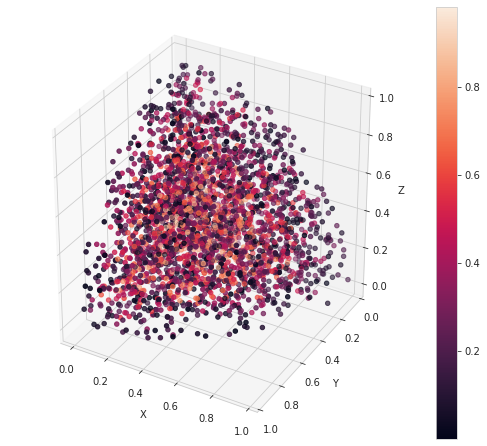

In [63]:
import seaborn as sns
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(7,6))

ax = Axes3D(fig) # Method 1

trials = int(1e4)
x = np.random.uniform(0,1,size=trials)
y = np.random.uniform(0,1,size=trials)
z = np.random.uniform(0,1,size=trials)
w = np.random.uniform(0,1,size=trials)
xr, yr, zr, wr = [], [], [], []


for i in range(0, trials):
    if x[i]**2 + y[i]**2 + z[i]**2 + w[i]**2 <= 1:
        xr.append(x[i])
        yr.append(y[i])
        zr.append(z[i])
        wr.append(w[i])

img = ax.scatter(xr, yr, zr, c=wr)


#legend
ax.set_xlabel('Y')
ax.set_ylabel('X')
ax.set_zlabel('Z')
ax.set_ylim(1,0)

fig.colorbar(img)
plt.show()